<a href="https://colab.research.google.com/github/blipbloping/datacleaning/blob/main/DMML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [26]:
df = pd.read_csv('loans.csv', index_col = 'client_id')
df.head()

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate
client_id,,,,,,,
46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15
46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25
46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68
46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24
46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13


In [23]:
df.shape

(443, 7)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 443 entries, 46109 to 26945
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   loan_type    443 non-null    object 
 1   loan_amount  443 non-null    int64  
 2   repaid       443 non-null    int64  
 3   loan_id      443 non-null    int64  
 4   loan_start   443 non-null    object 
 5   loan_end     443 non-null    object 
 6   rate         443 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 27.7+ KB


In [28]:
df['loan_id'] = df['loan_id'].astype('object')
df['repaid'] = df['repaid'].astype('category')
df['loan_start'] = pd.to_datetime(df['loan_start'], format = '%Y-%m-%d')
df['loan_end'] = pd.to_datetime(df['loan_end'], format = '%Y-%m-%d')

In [29]:
df.dtypes


loan_type              object
loan_amount             int64
repaid               category
loan_id                object
loan_start     datetime64[ns]
loan_end       datetime64[ns]
rate                  float64
dtype: object

In [30]:
df.describe() # summary stats for numerical data

,loan_amount,rate
count,443.000000,443.000000
mean,7982.311512,3.217156
std,4172.891992,2.397168
min,559.000000,0.010000
25%,4232.500000,1.220000
50%,8320.000000,2.780000
75%,11739.000000,4.750000
max,14971.000000,12.620000


In [31]:
df.describe(exclude=[np.number]) #summary stats for categorical data

,loan_type,repaid,loan_id,loan_start,loan_end
count,443,443.0,443.0,443,443
unique,4,2.0,443.0,430,428
top,home,1.0,10243.0,2007-05-16 00:00:00,2008-08-29 00:00:00
freq,121,237.0,1.0,2,2
first,NaN,NaN,NaN,2000-01-26 00:00:00,2001-08-02 00:00:00
last,NaN,NaN,NaN,2014-11-11 00:00:00,2017-05-07 00:00:00


In [32]:
df.isnull().sum() #check for missing values

loan_type      0
loan_amount    0
repaid         0
loan_id        0
loan_start     0
loan_end       0
rate           0
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

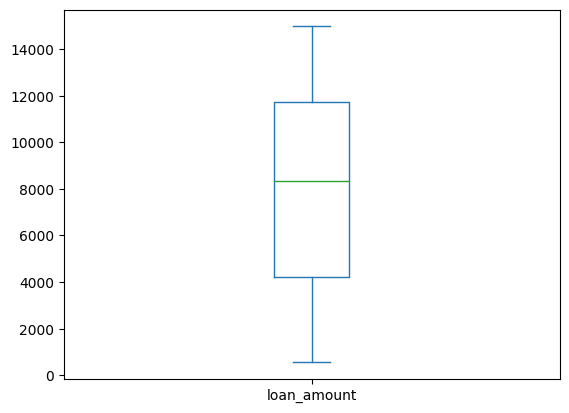

In [33]:
df['loan_amount'].plot(kind='box')
plt.show #checking outliers for loan amount

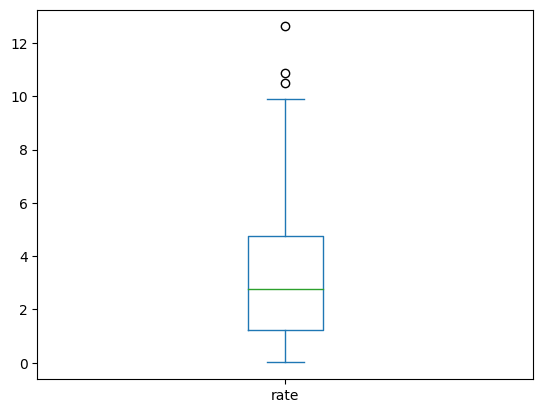

In [34]:
df['rate'].plot(kind='box')
plt.show() #checking outliers for rate

In [37]:
df['SQRT_RATE'] = df['rate']**0.5 #data transformation to treat outliers for rate
df['sqrt_rate'] = np.sqrt(df['rate'])
df.head()


,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,SQRT_RATE,sqrt_rate
client_id,,,,,,,,,
46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,1.466288,1.466288
46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,1.118034,1.118034
46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,0.824621,0.824621
46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,1.113553,1.113553
46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,1.769181,1.769181


In [39]:
print("The skewness of the original data is {}".format(df.rate.skew()))
print('The skewness of the SQRT transformed data is {}'.format(df.SQRT_RATE.skew()))
print('')
print("The kurtosis of the original data is {}".format(df.rate.kurt()))
print("The kurtosis of the SQRT transformed data is {}".format(df.SQRT_RATE.kurt()))


The skewness of the original data is 0.884204614329943
The skewness of the SQRT transformed data is 0.04964154055528862

The kurtosis of the original data is 0.42437165143736433
The kurtosis of the SQRT transformed data is -0.6318437642052039


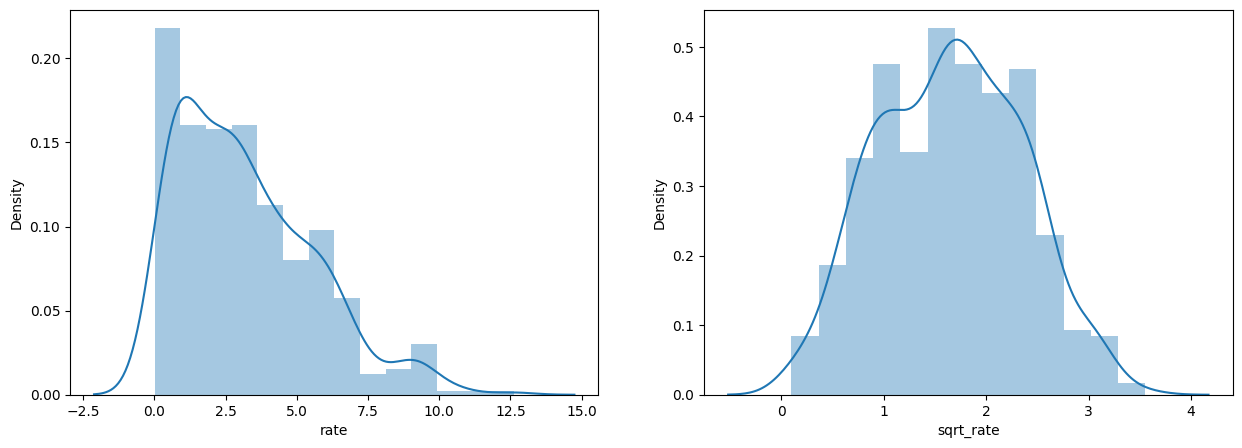

In [40]:
fig, axes = plt.subplots(1,2, figsize=(15,5))
sns.distplot(df['rate'], ax=axes[0])
sns.distplot(df['sqrt_rate'], ax=axes[1])
plt.show()